In [2]:
import os
import pandas as pd
import fathon
from fathon import fathonUtils as fu
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt


In [31]:
laptop_OS_folder = '/media/ak/OS/Data/FuturesDataSemiProcessed'
LaCie_ProcessedData = '/media/ak/LaCie/ProcessedSampledData/'
# returns_data = '/media/ak/T7/August11th2022Experiments/Returns/'
t7 = '/media/ak/T71/'
# june_ext = os.path.join(t7, 'June4th2022Experiments')
# returns_data = [f for f in os.listdir(june_ext) if '_returns' in f]
experimentsLocation = '/media/ak/Data1/August11th2022Experiments'
dfsLocation = os.path.join(experimentsLocation, 'mfdfaDataFrames')
bars =sorted(['tick', 'volume', 'calendar', 'dollar'])
bars

['calendar', 'dollar', 'tick', 'volume']

In [32]:
figures_destination = '/home/ak/Documents/Papers/StylisedFactsPaper/figures'

In [33]:
os.listdir(experimentsLocation)

['ExperimentInputFiles',
 'ExperimentInputFiles_old',
 'ExperimentOne',
 'G_1',
 'HiLoData',
 'HurstDicts',
 'InfoClockDataFrames',
 'LinearMMDInputFiles',
 'LinearMMDOutputFiles',
 'mfdfaDataFrames',
 'mfdfaDataFrames_old',
 'QuadMMDOutputFiles',
 'Returns',
 'RX1',
 'RX1_dollar_20180430_exp_df.pkl',
 'RX1_dollar_20180601_exp_df.pkl',
 'RX1_dollar_20180607_exp_df.pkl',
 'RX1_dollar_20180724_exp_df.pkl',
 'RX1_dollar_20180824_exp_df.pkl',
 'RX1_dollar_20180910_exp_df.pkl',
 'RX1_volume_20180601_exp_df.pkl',
 'RX1_volume_20180724_exp_df.pkl',
 'RX1_volume_20180910_exp_df.pkl',
 'RXOld_do_I_delete',
 'TablesOfResults',
 'TestMMDOutputFiles',
 'XM1']

In [49]:
ExpOne = os.path.join(experimentsLocation, 'ExperimentOne')
symbol = 'JB1'
symbol_files = [f for f in os.listdir(ExpOne) if str(symbol) in f]
bar_choice = bars[1]
bar_choice_files = [f for f in os.listdir(os.path.join(ExpOne,symbol_files[0]))  if str(bar_choice) in f]
symbolPath = os.path.join(ExpOne, symbol)

In [50]:
symbol_files

['JB1']

In [51]:
## put all the variables into one big DataFrame each and then use them

In [53]:
fileIdx  = 1

file_path = os.path.join(symbolPath, bar_choice_files[fileIdx])
file_path

'/media/ak/Data1/August11th2022Experiments/ExperimentOne/JB1/JB1_10dollar_mfdfa.pkl'

In [54]:
print('your bar_choice is', bar_choice)
bar_choice_dict = pd.read_pickle(file_path)

your bar_choice is dollar


In [56]:
bar_choice_files

['JB1_0dollar_mfdfa.pkl',
 'JB1_10dollar_mfdfa.pkl',
 'JB1_11dollar_mfdfa.pkl',
 'JB1_12dollar_mfdfa.pkl',
 'JB1_16dollar_mfdfa.pkl',
 'JB1_18dollar_mfdfa.pkl',
 'JB1_2dollar_mfdfa.pkl',
 'JB1_4dollar_mfdfa.pkl',
 'JB1_7dollar_mfdfa.pkl',
 'JB1_8dollar_mfdfa.pkl',
 'JB1_9dollar_mfdfa.pkl']

## $$\\tau$$

In [57]:
tau_dict = dict()
tau_df = pd.DataFrame()
for fileIdx in range(0,32):
    wanted_keys = ['tau'] # The keys you want
    file_path = os.path.join(ExpOne, bar_choice_files[fileIdx])
    bar_choice_dict = pd.read_pickle(file_path)[bar_choice]
    tau_dict[fileIdx] = np.array([bar_choice_dict[k] for k in wanted_keys if k in bar_choice_dict])
    tau_df[fileIdx] = np.nan_to_num(tau_dict[fileIdx]).reshape(-1)
    

FileNotFoundError: [Errno 2] No such file or directory: '/media/ak/Data1/August11th2022Experiments/ExperimentOne/JB1_0dollar_mfdfa.pkl'

### storing elements

In [267]:
file_name = str(symbol)+str(bar_choice)+str('_tau')+str('.pkl')
file_loc = os.path.join(dfsLocation, file_name)
tau_df.to_pickle(file_loc)

# $$\\alpha$$

In [272]:
alpha_dict = dict()
alpha_df = pd.DataFrame()
mfSpect_dict = dict()
mfSpect_df = pd.DataFrame()
for fileIdx in range(0,32):
    wanted_keys = ['alpha'] # The keys you want
    file_path = os.path.join(ExpOne, bar_choice_files[fileIdx])
    bar_choice_dict = pd.read_pickle(file_path)[bar_choice]
    alpha_dict[fileIdx] = np.array([bar_choice_dict[k] for k in str('alpha') if k in bar_choice_dict])
    alpha_df[fileIdx] = np.nan_to_num(alpha_dict[fileIdx]).reshape(-1)
    mfSpect_dict[fileIdx] = np.array([bar_choice_dict[k] for k in str('mfSpect')if k in bar_choice_dict])
    mfSpect_df[fileIdx] = np.nan_to_num(mfSpect_dict[fileIdx]).reshape(-1)

In [271]:
file_name = str(symbol)+str(bar_choice)+str('_alpha')+str('.pkl')
file_loc = os.path.join(dfsLocation, file_name)
alpha_df.to_pickle(file_loc)

In [273]:
file_name = str(symbol)+str(bar_choice)+str('_mfSpect')+str('.pkl')
file_loc = os.path.join(dfsLocation, file_name)
mfSpect_df.to_pickle(file_loc)

In [166]:
# plot a few data points!
# Plot the data
# plt.plot(X[:, 0], X[:, 1], "b.", markeredgecolor="b", label="$X\sim P$", alpha=0.5)
# plt.plot(Y[:, 0], Y[:, 1], "r.", markeredgecolor="r", label="$Y\sim Q$", alpha=0.5)

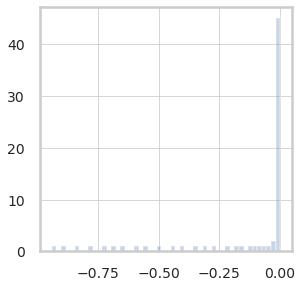

In [234]:
index_one = 1
shift = 1
index_two = index_one + shift
_=plt.hist(tau_df[index_one], alpha =0.3, bins = 50)

In [235]:
import seaborn as sns

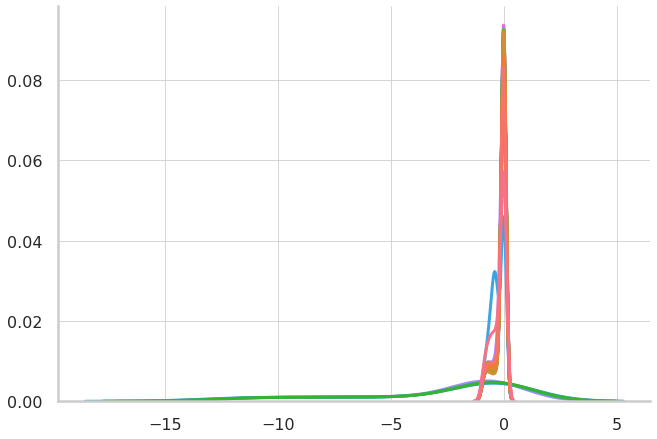

In [236]:
#sns.displot(data=tau_df, x=index_one, kind='hist', height=6, aspect=1.4, bins = 18, log_scale = True)
sns.set_style(style='whitegrid')
#sns.set_context("paper")
sns.set_context("poster", font_scale = 0.3, rc={"grid.linewidth": 0.8})
#sns.set_context("poster", font_scale = 1, rc={"grid.linewidth": 5})
#sns.set(rc = {'figure.figsize':(19.20,10.80)})
p = sns.displot(data=tau_df,  kind='kde', height=6,color='black', aspect=1.5, legend = False)

plt.ylabel('', fontsize=16);
plt.tick_params(axis='both', which='major', labelsize=16)

fig_name = 'tau_'+str(symbol)+str(bar_choice)

fig_save_name = ".".join((fig_name, 'png'))
fig_save_name
file_name_loc_to_save = os.path.join(figures_destination,fig_save_name)
p.figure.savefig(file_name_loc_to_save)

In [258]:
# sns.plotting_context()

# plot elements

In [239]:
# sort out parameters for plotting

# sns.displot(data=tau_df, x=index_one, kind='hist', height=6, aspect=1.4, bins = 18, log_scale = True)
sns.set_style(style='whitegrid')

sns.set_context("poster", font_scale = 0.3, rc={"grid.linewidth": 0.8})



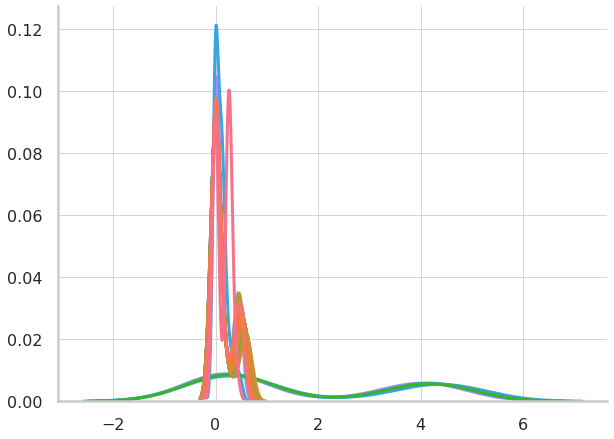

In [240]:
#sns.displot(data=tau_df, x=index_one, kind='hist', height=6, aspect=1.4, bins = 18, log_scale = True)
p=sns.displot(data=alpha_df,  kind='kde', height=6, aspect=1.4,  color='green',legend = False)
# p.set_xlabel("X-Axis", fontsize = 20)
# plt.ylabel('Density', fontsize=20);


plt.ylabel('', fontsize=16);
plt.tick_params(axis='both', which='major', labelsize=16)

fig_name = 'alpha_'+str(symbol)+str(bar_choice)

fig_save_name = ".".join((fig_name, 'png'))
fig_save_name
file_name_loc_to_save = os.path.join(figures_destination,fig_save_name)
p.figure.savefig(file_name_loc_to_save)

In [241]:

mfSpect_dict = dict()
mfSpect_df = pd.DataFrame()
for fileIdx in range(0,32):
    wanted_keys = ['mfSpect'] # The keys you want
    file_path = os.path.join(ExpOne, bar_choice_files[fileIdx])
    bar_choice_dict = pd.read_pickle(file_path)[bar_choice]


In [242]:
median_alpha = alpha_df.median().values
median_mfSpect = mfSpect_df.median().values

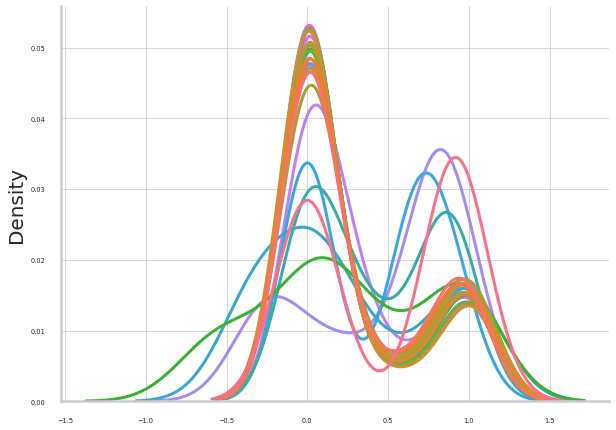

In [243]:
#sns.displot(data=tau_df, x=index_one, kind='hist', height=6, aspect=1.4, bins = 18, log_scale = True)
p=sns.displot(data=mfSpect_df,  kind='kde', height=6, aspect=1.4,  color='blue',legend = False)
# p.set_xlabel("X-Axis", fontsize = 20)
plt.ylabel('Density', fontsize=20);

In [244]:
winSizes = fu.linRangeByStep(10, 2000)  # this needs to be more dynamic
qs = np.arange(-3, 4, 0.1)
revSeg = True
polOrd = 1

In [77]:
# alpha = bar_choice_dict[keys[0]]
# list_H = bar_choice_dict[keys[1]]
# list_H_intercept = bar_choice_dict[keys[2]]
# mfSpect = bar_choice_dict[keys[3]]
# # # n = list(bar_choice_dict[keys[4]].keys())
# n_F = bar_choice_dict[keys[4]]
# n, F = [list(x) for x in zip(*n_F.items())]
# F = np.asanyarray(F).reshape(1991, 70)
# n = np.asanyarray(n)
# tau = bar_choice_dict[keys[5]]

In [251]:
# F.shape
# F

In [177]:


# list_H, list_H_intercept = pymfdfa.fitFlucVec()
# plt.plot(np.log(n), np.log(F[0, :]), 'b',alpha =0.35,marker='s', markerfacecolor='blue',markeredgecolor='blue', markersize=4)

plt.plot(np.log(n), list_H_intercept[0]+list_H[0]*np.log(n), 'b--', label='h_{:.1f} = {:.2f}'.format(qs[0], list_H[0]))
half_idx = int(len(qs)/2)

plt.plot(np.log(n), np.log(F[half_idx, :]), 'c', alpha=0.75,marker='o', markersize=4)

plt.plot(np.log(n), list_H_intercept[half_idx]+list_H[half_idx]*np.log(n),
         'b--', label='h_{:.1f} = {:.2f}'.format(qs[half_idx], list_H[half_idx]), color='blue',linestyle = ':')

plt.plot(np.log(n), np.log(F[-1, :]), 'g', alpha=0.55,marker='o', markersize=4)

plt.plot(np.log(n), list_H_intercept[-1]+list_H[-1]*np.log(n), 'b:',
         label='h_{:.1f} = {:.2f}'.format(qs[-1], list_H[-1]))
plt.xlabel("ln(n)", fontsize=14)
plt.ylabel("ln(F(n))", fontsize=14)
plt.title('MFDFA', fontsize=14)

NameError: name 'n' is not defined

In [183]:
params = {
   'axes.labelsize': 14,
   'font.size': 14,
   'legend.fontsize': 14,
   'xtick.labelsize': 14,
   'ytick.labelsize': 14,
   'text.usetex': False,
   'figure.figsize': [4.5, 4.5]
   }
plt.rcParams.update(params)

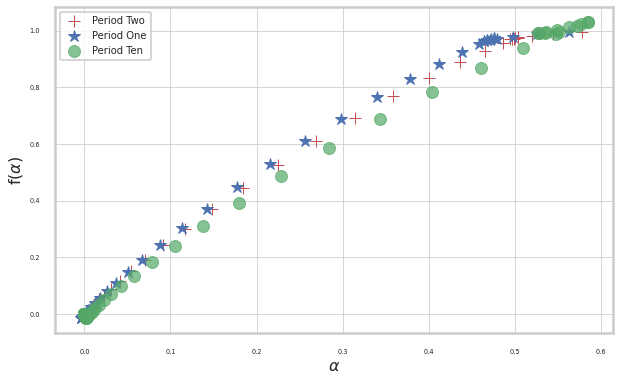

In [246]:
fig = plt.figure(figsize=(10,6))
plt.plot(alpha_df[2], mfSpect_df[2], 'r+', label ='Period Two')
plt.plot(alpha_df[1], mfSpect_df[1], 'b*', label ='Period One')
plt.plot(alpha_df[10], mfSpect_df[10], 'go', label ='Period Ten', alpha =0.7)
plt.xlabel('$\\alpha$', fontsize = 16)
plt.ylabel('f($\\alpha$)', fontsize = 16)
plt.legend(fontsize = 10)
fig_name = 'alpha_mfSpect'+str(symbol)+str(bar_choice)

fig_save_name = ".".join((fig_name, 'png'))
fig_save_name
file_name_loc_to_save = os.path.join(figures_destination,fig_save_name)
p.figure.savefig(file_name_loc_to_save)
plt.show()


In [247]:
tau_for_plot = tau_df[tau_df[3]>0].median()
qs_for_plot = qs[tau_df[3]>0]

In [248]:
tau_for_plot

0    -0.098789
1    -0.002632
2     0.002054
3     0.020882
4     0.023799
5     0.019719
6     0.006244
7     0.003110
8     0.010141
9     0.006080
10    0.018295
11   -0.003589
12    0.009082
13    0.020905
14    0.015962
15    0.005320
16   -0.123861
17    0.013973
18    0.005817
19    0.000719
20    0.015405
21   -0.326339
22    0.016497
23    0.004027
24   -0.397217
25   -0.063534
26    0.029288
27    0.009291
28   -0.000159
29    0.017679
30    0.017435
31    0.003430
dtype: float64

In [254]:
# plt.plot(qs, tau_for_plot, ':',marker='o', markeredgecolor ='black', alpha = 0.65, markersize =8)
# # plt.plot(qs, tau, 'go-')

# plt.xlabel('q', fontsize=14)
# plt.ylabel('$\\tau$(q)', fontsize=14)
# plt.title('$\\tau$(q)', fontsize=14)
# plt.show()

In [255]:
# qs = np.arange(-3, 4, 0.21)
# len(qs)